### KNN ex1

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [4]:
fruits = pd.read_csv(r'C:\Users\moham\OneDrive - University of Central Missouri\Desktop\Imran\Training\Inceptez\Prep\fruits_color.txt', sep='\t')

In [6]:
fruits[:3]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60


In [7]:
fruits['fruit_label'].value_counts()

1    19
3    19
4    16
2     5
Name: fruit_label, dtype: int64

In [8]:
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

In [13]:
look_up_fruit_name = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))
look_up_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [15]:
fruits.shape

(59, 7)

In [17]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

### Plotting


array([[<AxesSubplot:xlabel='mass', ylabel='mass'>,
        <AxesSubplot:xlabel='width', ylabel='mass'>,
        <AxesSubplot:xlabel='height', ylabel='mass'>,
        <AxesSubplot:xlabel='color_score', ylabel='mass'>],
       [<AxesSubplot:xlabel='mass', ylabel='width'>,
        <AxesSubplot:xlabel='width', ylabel='width'>,
        <AxesSubplot:xlabel='height', ylabel='width'>,
        <AxesSubplot:xlabel='color_score', ylabel='width'>],
       [<AxesSubplot:xlabel='mass', ylabel='height'>,
        <AxesSubplot:xlabel='width', ylabel='height'>,
        <AxesSubplot:xlabel='height', ylabel='height'>,
        <AxesSubplot:xlabel='color_score', ylabel='height'>],
       [<AxesSubplot:xlabel='mass', ylabel='color_score'>,
        <AxesSubplot:xlabel='width', ylabel='color_score'>,
        <AxesSubplot:xlabel='height', ylabel='color_score'>,
        <AxesSubplot:xlabel='color_score', ylabel='color_score'>]],
      dtype=object)

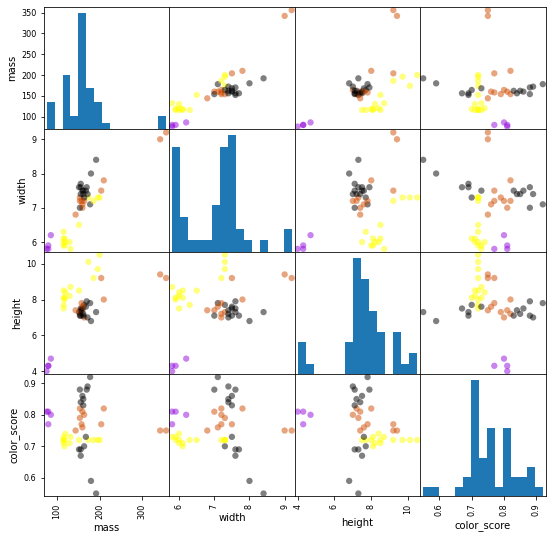

In [23]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')

scatter_matrix(X_train, c = y_train, marker= 'o', s = 40, hist_kwds={'bins':15}, figsize = (9, 9), cmap = cmap)

### Plotting in 3D

In [25]:
from mpl_toolkits.mplot3d import Axes3D

In [42]:
fig.add_subplot?

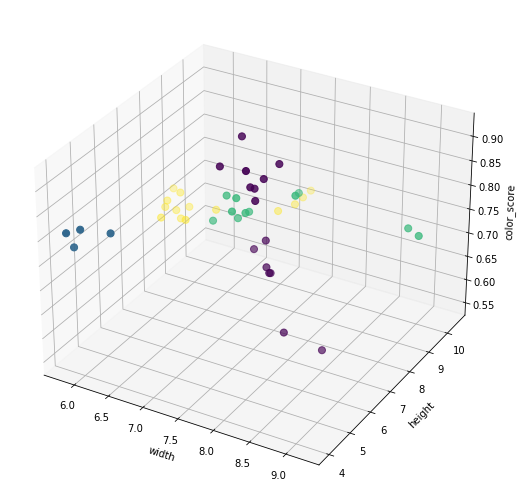

In [45]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c= y_train, marker = 'o', s = 50)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [46]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
knn.score(X_test, y_test)

0.5333333333333333

In [52]:
fruit_pred = knn.predict([[20, 4.3, 5.5]])
look_up_fruit_name[fruit_pred[0]]

C:\Users\moham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [53]:
fruit_pred = knn.predict([[100, 6.3, 8.5]])
look_up_fruit_name[fruit_pred[0]]

C:\Users\moham\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

### Finding the optimal value of K

([<matplotlib.axis.XTick at 0x1c59d0b9d30>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

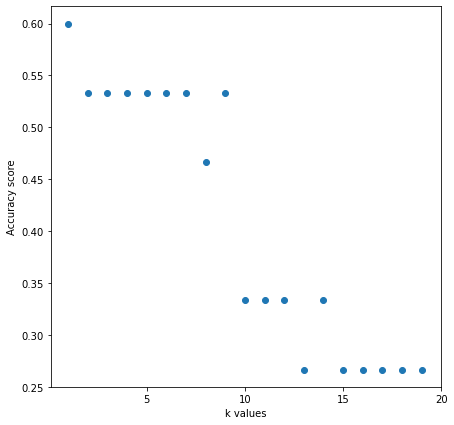

In [55]:
k_range = range(1, 20)
score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))
    
plt.figure(figsize = (7, 7))
plt.xlabel('k values')
plt.ylabel('Accuracy score')
plt.scatter(k_range, score)
plt.xticks([5, 10, 15, 20])


### Checking the KNN performance based on the varying test sizes

Text(0, 0.5, 'Accuracy scores')

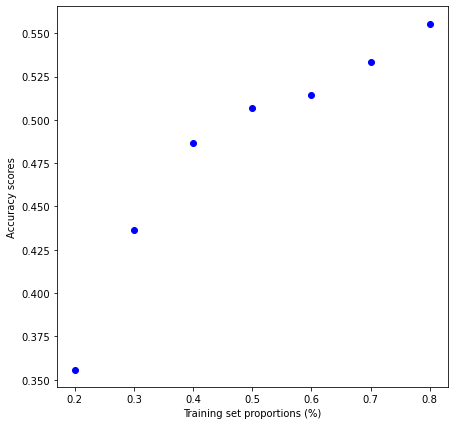

In [56]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors=5)
plt.figure(figsize = (7, 7))

for s in t:
    score = []
    for i in range(1, 100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 - s)
        knn.fit(X_train, y_train)
        score.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(score), 'bo')

plt.xlabel('Training set proportions (%)')
plt.ylabel('Accuracy scores')
    

### KNN ex2


In [57]:
train = pd.DataFrame({'id': [0, 1, 2], 'length':[0.9, 0.3, 0.6], 'mass': [0.1, 0.2, 0.8], 'rings':[40, 50, 60]})
test = pd.DataFrame({'lenth':[0.59], 'mass':[0.79], 'rings':[54]})


In [58]:
train

,id,length,mass,rings
0,0,0.9,0.1,40
1,1,0.3,0.2,50
2,2,0.6,0.8,60


In [59]:
test

,lenth,mass,rings
0,0.59,0.79,54


In [ ]:
# from sklearn.neighbors import KNeighborsRegressor

In [60]:
feature_cols = ['length', 'mass', 'rings']
X = train[feature_cols]
y = train['id']

In [63]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [64]:
knn.predict(test)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- lenth
Feature names seen at fit time, yet now missing:
- length

  warnings.warn(message, FutureWarning)


array([1], dtype=int64)

In [65]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (5, 5)

In [66]:
colors =np.array(['red', 'green', 'blue'])

Text(0.5, 1.0, 'Features interpretation')

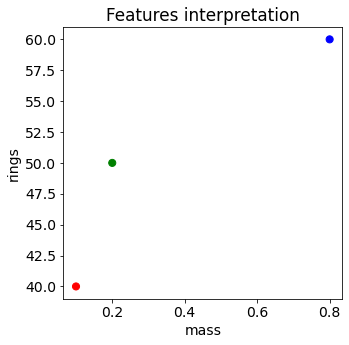

In [68]:
plt.scatter(train.mass, train.rings, c=colors[train.id], s = 50)

# plt.scatter(train.mass, train.rings, c ='white', s = 50)
plt.xlabel('mass')
plt.ylabel('rings')
plt.title('Features interpretation')

(0.0, 60.0)

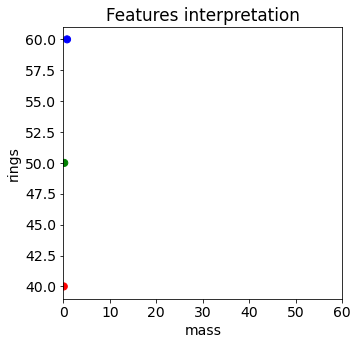

In [70]:
plt.scatter(train.mass, train.rings, c=colors[train.id], s = 50)

# plt.scatter(train.mass, train.rings, c ='white', s = 50)
plt.xlabel('mass')
plt.ylabel('rings')
plt.title('Features interpretation')
plt.xlim(0, 60)

### Standardization

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [73]:
X.values

array([[ 0.9,  0.1, 40. ],
       [ 0.3,  0.2, 50. ],
       [ 0.6,  0.8, 60. ]])

In [74]:
X_scaled

array([[ 1.22474487, -0.86266219, -1.22474487],
       [-1.22474487, -0.53916387,  0.        ],
       [ 0.        ,  1.40182605,  1.22474487]])

In [75]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
col_names = ['label', 'color', 'proline']

In [78]:
wine = pd.read_csv(url, header=None, names=col_names, usecols=[0, 10, 13])

In [79]:
wine.head()

,label,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735


In [80]:
wine.describe()

,label,color,proline
count,178.000000,178.000000,178.000000
mean,1.938202,5.058090,746.893258
std,0.775035,2.318286,314.907474
min,1.000000,1.280000,278.000000
25%,1.000000,3.220000,500.500000
50%,2.000000,4.690000,673.500000
75%,3.000000,6.200000,985.000000
max,3.000000,13.000000,1680.000000


In [81]:
feature_cols = ['color', 'proline']
X = wine[feature_cols]
y = wine['label']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [83]:
X_train_scaled = scaler.fit_transform(X_train)

In [86]:
X_train_scaled[:, 0].mean(), X_train_scaled[:, 0].std()

(4.0068199384968053e-17, 1.0)

In [87]:
X_train_scaled[:, 1].mean(), X_train_scaled[:, 1].std()

(-5.092000338506357e-17, 1.0)

In [88]:
X_test_scaled = scaler.transform(X_test)

### KNN on original data

In [89]:
from sklearn import metrics

In [90]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7777777777777778


In [91]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print(metrics.accuracy_score(y_test, y_pred))

0.8666666666666667
